In [189]:
#Find those who survived given they were female and their passenger class was 3 using naive bayes algorithm

#Bayes 'Theorem' : P(Survived | pclass=3, gender=female) = P(pclass=3, gender=female | survived) * P(survived)/ 
#P(pclass=3,gender=female)



In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [191]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [192]:
#One - hot encode gender column
df = pd.get_dummies(df , columns=['Sex'])
#Now gender column will replace with 2 columns #gender_male and gender_female
df


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,False,True
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,True,False
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,False,True
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,S,False,True
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,C,True,False
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,True
416,1308,0,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,S,False,True


In [193]:
X = df[['Pclass', 'Sex_female']]
y = df['Survived']

In [194]:
#Split data into training and testig sets

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [195]:
#Create naive bayes classifier 
nb = GaussianNB()
#Train the classifier
nb.fit(X_train, Y_train)


GaussianNB()

In [196]:
#Make predictions on test data
y_pred = nb.predict(X_test)

In [197]:
#Create dataframe to show predictions and actual values
results =  pd.DataFrame({'Actual' : Y_test ,'Predicton': y_pred})
results

,Actual,Predicton
321,0,0
324,1,1
388,0,0
56,0,0
153,1,1
...,...,...
57,0,0
126,0,0
24,1,1
17,0,0


In [198]:
#Calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
accuracy

1.0

In [199]:
#Predict probability of survival for female passenger in class 3
new_passenger = [[3,1]] #1=gender==female is true
new_passenger

[[3, 1]]

In [200]:
predicted_probability = nb.predict_proba(new_passenger)
predicted_probability
#Sample output - 0.3, 0.7
#It might return 0.3 (p(did not survive), 0.7(p(survived)) int the 0th row  

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [201]:
#Evaluate model with confusion matrix  and classification report 
conf_matrix = confusion_matrix(Y_test, y_pred)
print('COnfusion Matrix')
print(conf_matrix)

COnfusion Matrix
[[50  0]
 [ 0 34]]


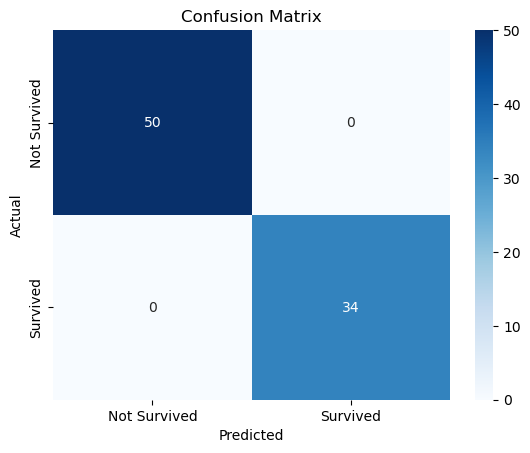

In [202]:
#Visualize the confusion matrix 
sns.heatmap(conf_matrix, annot= True, fmt = 'd', cmap = 'Blues', xticklabels=['Not Survived','Survived' ], yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Assignment 

In [204]:
#Do naive base classification for the Heart.csv dataset to predict if the patient has a heart disease . 
#Evaluate the models accuracy using results on the test set and using confusion matrix. 
#predict for a patient having age =50 , Gender = male, RestingBP = 150, Cholesterol = 200 , MaxHR = 130
#Use only these columns as predicting features .
#then perform the same using logistic regression and compare results

In [205]:
df = pd.read_csv('Heart-1.csv')

In [206]:
df

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [207]:
df = pd.get_dummies(df,columns=['Gender'])

In [208]:
df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender_F,Gender_M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,False,True
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,True,False
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,False,True
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,True,False
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,N,1.2,Flat,1,False,True
914,68,ASY,144,193,1,Normal,141,N,3.4,Flat,1,False,True
915,57,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,False,True
916,57,ATA,130,236,0,LVH,174,N,0.0,Flat,1,True,False


In [209]:
X = df[['Age','Gender_M','RestingBP','Cholesterol','MaxHR']]
y = df['HeartDisease']

In [210]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [211]:
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [212]:
y_pred = nb.predict(X_test)

In [213]:
#Create dataframe to show predictions and actual values
results =  pd.DataFrame({'Actual' : Y_test ,'Predicton': y_pred})
results

,Actual,Predicton
668,0,0
30,1,1
377,1,1
535,1,1
807,0,0
...,...,...
211,1,0
745,1,0
584,1,1
878,0,0


In [214]:
#Calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.7282608695652174

In [215]:
new_patient = [[50,1,150,200,130]]


In [216]:
predicted_probability = nb.predict_proba(new_patient)
predicted_probability

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([[0.32024207, 0.67975793]])

In [249]:
#Evaluate model with confusion matrix  and classification report 
conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix

array([[53, 24],
       [26, 81]], dtype=int64)

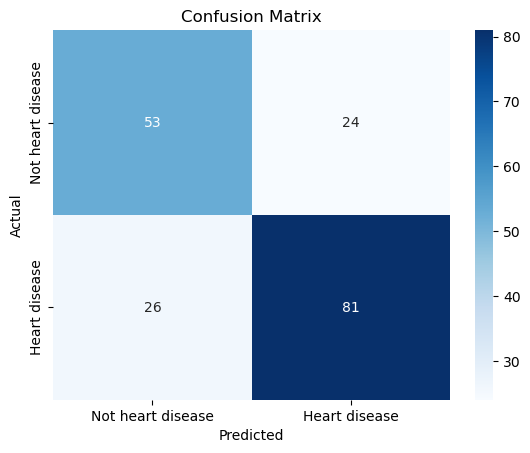

In [251]:
#Visualize the confusion matrix 
sns.heatmap(conf_matrix, annot= True, fmt = 'd', cmap = 'Blues', xticklabels=['Not heart disease','Heart disease' ], yticklabels=['Not heart disease','Heart disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# performing with logistic Regression

In [253]:
from sklearn.linear_model import LogisticRegression

In [255]:
#Create and train a logistic Regression Model
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [263]:
#Make Predictions
y_test_prediction = classifier.predict(X_test)
y_train_prediction = classifier.predict(X_train) 
y_test_prediction

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [265]:
#Display predictions comparision
comparision = pd.DataFrame({'Actual': Y_test , 'predicted' : y_test_prediction})
print(comparision.head(10))

     Actual  predicted
668       0          0
30        1          0
377       1          1
535       1          1
807       0          0
793       1          1
363       1          1
583       0          1
165       1          0
483       1          1


In [267]:
#print accuracy score
print(f"Test Accuracy: {accuracy_score(Y_test,y_test_prediction):.4f}")
print(f"Test Accuracy: {accuracy_score(Y_train,y_train_prediction):.4f}")

Test Accuracy: 0.7011
Test Accuracy: 0.7316


In [269]:
#Confusion matrix
conf_mat = confusion_matrix(Y_test, y_test_prediction)
print("\nConfusion Matrix :")
print(conf_mat)


Confusion Matrix :
[[51 26]
 [29 78]]


In [271]:
#Evaluate model with confusion matrix  and classification report 
conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix

array([[53, 24],
       [26, 81]], dtype=int64)

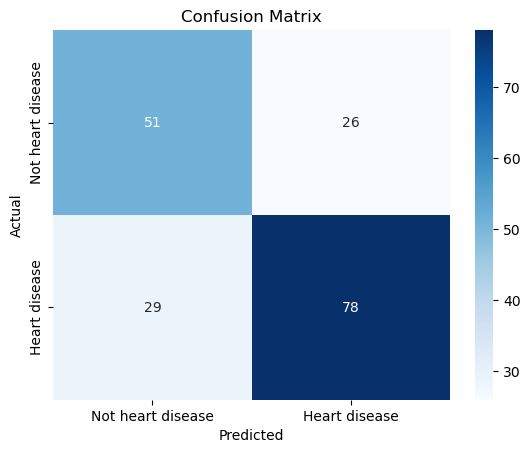

In [275]:
#Visualize the confusion matrix 
sns.heatmap(conf_mat, annot= True, fmt = 'd', cmap = 'Blues', xticklabels=['Not heart disease','Heart disease' ], yticklabels=['Not heart disease','Heart disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Conclusion: In this case Naive Bayes gave better accuracy